In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [98]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [99]:
#Outcome  = 1 hasta 0 sağlıklı

In [100]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [101]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [102]:
diabetes = data[data.Outcome==1]
healthy = data[data.Outcome==0]

In [103]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [104]:
healthy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


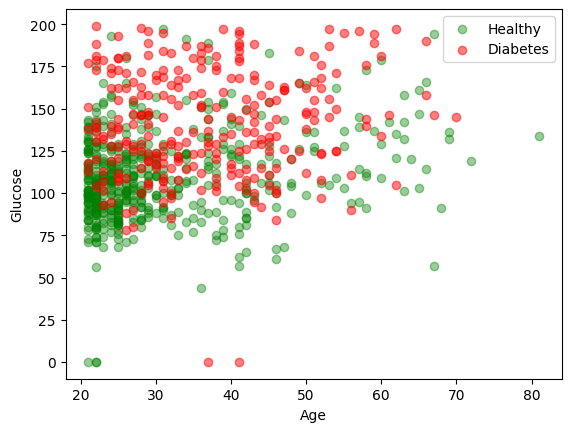

In [105]:
plt.scatter(healthy.Age,healthy.Glucose,color="green",label="Healthy", alpha = 0.4) #önce x sonra y verilir
plt.scatter(diabetes.Age,diabetes.Glucose,color="red",label="Diabetes",alpha = 0.5) #alpha koyuluk
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend() #sağ üst köşeyi gösteriyor
plt.show()

In [106]:
#x ve y belirlenmesi

In [107]:
y = data.Outcome.values #bağımlı değişken outcome(bulmak istedigimiz sey)

In [108]:
    #outcome bağımlı değisken (diger degerlere bagli olarak hasta ya da degil)

In [109]:
x_raw_data = data.drop(["Outcome"], axis=1)

# Outcome sütununu(dependent variable) çıkarıp sadece independent variables bırakıyoruz
# Çüknü KNN algoritması x değerleri içerisinde gruplandırma yapacak..


In [110]:
x_raw_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [111]:

# normalization yapıyoruz - x_ham_veri içerisindeki değerleri sadece 0 ve 1 arasında olacak şekilde hepsini güncelliyoruz
# Eğer bu şekilde normalization yapmazsak yüksek rakamlar küçük rakamları ezer ve KNN algoritmasını yanıltabilir!
#0 ile 1 arasına aldık her şeyi
x = (x_raw_data - np.min(x_raw_data))/(np.max(x_raw_data)-np.min(x_raw_data))

# önce
print("Normalization öncesi ham veriler:\n")
print(x_raw_data.head())


# sonra 
print("\n\n\nNormalization sonrası yapay zekaya eğitim için vereceğimiz veriler:\n")
print(x.head())
    


Normalization öncesi ham veriler:

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  



Normalization sonrası yapay zekaya eğitim için vereceğimiz veriler:

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.007092  0.174941       0.085106       0.041371  0.000000  0.039716   
1     0.001182  0.100473       0.078014       0.034279  0.000000  0.031442   
2     0.009456  

In [112]:

# train datamız ile test datamızı ayırıyoruz
# train datamız sistemin sağlıklı insan ile hasta insanı ayırt etmesini öğrenmek için kullanılacak
# test datamız ise bakalım makine öğrenme modelimiz doğru bir şekilde hasta ve sağlıklı insanları ayırt edebiliyor mu diye 
# test etmek için kullanılacak...
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1,random_state=1)


In [113]:

# knn modelimizi oluşturuyoruz.
knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print("K=3 için Test verilerimizin doğrulama testi sonucu ", knn.score(x_test, y_test))

K=3 için Test verilerimizin doğrulama testi sonucu  0.7792207792207793


In [114]:
# k kaç olmalı ?
# en iyi k değerini belirleyelim..
sayac = 1
for k in range(1,11):
    knn_yeni = KNeighborsClassifier(n_neighbors = k)
    knn_yeni.fit(x_train,y_train)
    print(sayac, "  ", "Doğruluk oranı: %", knn_yeni.score(x_test,y_test)*100)
    sayac += 1
    
    

1    Doğruluk oranı: % 79.22077922077922
2    Doğruluk oranı: % 74.02597402597402
3    Doğruluk oranı: % 77.92207792207793
4    Doğruluk oranı: % 74.02597402597402
5    Doğruluk oranı: % 72.72727272727273
6    Doğruluk oranı: % 75.32467532467533
7    Doğruluk oranı: % 74.02597402597402
8    Doğruluk oranı: % 76.62337662337663
9    Doğruluk oranı: % 76.62337662337663
10    Doğruluk oranı: % 76.62337662337663


In [115]:
#YENİ HASTA TAHMİNİ

In [116]:
# Yeni bir hasta tahmini için:
from sklearn.preprocessing import MinMaxScaler
 
# normalization yapıyoruz - daha hızlı normalization yapabilmek için MinMax  scaler kullandık...
sc = MinMaxScaler()
sc.fit_transform(x_raw_data)
 
new_prediction = knn.predict(sc.transform(np.array([[6,148,72,35,0,33.6,0.627,50]])))
new_prediction[0]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0